In [1]:
import flapjack
from flapjack import registry as reg
from flapjack import analysis as analysis
from flapjack import tables as tables
import matplotlib.pyplot as plt
import pandas as pd
import pandas.io.sql as psql
import numpy as np
import scipy
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
registry = reg.Registry(database_name='data', username='maca', password='macata125')

In [4]:
# First we make a query to the database by applying filters 
qall = registry.queryAll()
qexp= qall.filter((tables.samples.experiment_id==11)|(tables.samples.experiment_id==12)|(tables.samples.experiment_id==13))


qsss = qexp.filter(tables.plasmids.name=='pLux76:RFP/std:YFP/std:CFP')
qpss = qexp.filter(tables.plasmids.name=='pLux76:RFP/J23107:YFP/std:CFP')
qpts = qexp.filter(tables.plasmids.name=='pLux76:RFP/pLacI:YFP/std:CFP')
qpls = qexp.filter(tables.plasmids.name=='pLux76:RFP/pLas81:YFP/std:CFP')

dfexp=psql.read_sql_query(qexp.selectable, registry.engine)
dfsss = psql.read_sql_query(qsss.selectable, registry.engine)
dfsss.head()


,supplements_concentration,inducers_name,measurements_id,measurements_name,measurements_value,measurements_time,measurements_sample_id,samples_id,samples_experiment_id,samples_row,samples_col,samples_media,plasmids_id,plasmids_name,cells_strain,experiments_id,experiments_name,experiments_machine
0,0.0,Layout,335235,OD600:600,0.086,0.194444,963,963,11,1,3,M9-glucosa,5,pLux76:RFP/std:YFP/std:CFP,Top10,11,cinetica 3 rep 1 1,Synergy HTX15070916
1,0.0,Layout,335236,OD600:600,0.086,0.194444,964,964,11,1,4,M9-glucosa,5,pLux76:RFP/std:YFP/std:CFP,Top10,11,cinetica 3 rep 1 1,Synergy HTX15070916
2,0.0,Layout,335237,OD600:600,0.086,0.194444,965,965,11,1,5,M9-glucosa,5,pLux76:RFP/std:YFP/std:CFP,Top10,11,cinetica 3 rep 1 1,Synergy HTX15070916
3,0.0,Layout,335238,OD600:600,0.085,0.194444,966,966,11,1,6,M9-glucosa,5,pLux76:RFP/std:YFP/std:CFP,Top10,11,cinetica 3 rep 1 1,Synergy HTX15070916
4,0.0,Layout,335239,OD600:600,0.087,0.194444,967,967,11,1,7,M9-glucosa,5,pLux76:RFP/std:YFP/std:CFP,Top10,11,cinetica 3 rep 1 1,Synergy HTX15070916


In [5]:
dfpss = psql.read_sql_query(qpss.selectable, registry.engine)
dfpss.head()


,supplements_concentration,inducers_name,measurements_id,measurements_name,measurements_value,measurements_time,measurements_sample_id,samples_id,samples_experiment_id,samples_row,samples_col,samples_media,plasmids_id,plasmids_name,cells_strain,experiments_id,experiments_name,experiments_machine
0,0.0,Layout,335240,OD600:600,0.086,0.194444,968,968,11,1,8,M9-glucosa,10,pLux76:RFP/J23107:YFP/std:CFP,Top10,11,cinetica 3 rep 1 1,Synergy HTX15070916
1,0.0,Layout,335241,OD600:600,0.086,0.194444,969,969,11,1,9,M9-glucosa,10,pLux76:RFP/J23107:YFP/std:CFP,Top10,11,cinetica 3 rep 1 1,Synergy HTX15070916
2,0.0,Layout,335242,OD600:600,0.085,0.194444,970,970,11,1,10,M9-glucosa,10,pLux76:RFP/J23107:YFP/std:CFP,Top10,11,cinetica 3 rep 1 1,Synergy HTX15070916
3,0.0,Layout,335243,OD600:600,0.086,0.194444,971,971,11,1,11,M9-glucosa,10,pLux76:RFP/J23107:YFP/std:CFP,Top10,11,cinetica 3 rep 1 1,Synergy HTX15070916
4,0.0,Layout,335244,OD600:600,0.085,0.194444,972,972,11,1,12,M9-glucosa,10,pLux76:RFP/J23107:YFP/std:CFP,Top10,11,cinetica 3 rep 1 1,Synergy HTX15070916


In [6]:
dfpts = psql.read_sql_query(qpts.selectable, registry.engine)
dfpts.head()

,supplements_concentration,inducers_name,measurements_id,measurements_name,measurements_value,measurements_time,measurements_sample_id,samples_id,samples_experiment_id,samples_row,samples_col,samples_media,plasmids_id,plasmids_name,cells_strain,experiments_id,experiments_name,experiments_machine
0,0.0,Layout,335259,OD600:600,0.087,0.194444,987,987,11,3,3,M9-glucosa,7,pLux76:RFP/pLacI:YFP/std:CFP,Top10,11,cinetica 3 rep 1 1,Synergy HTX15070916
1,0.0,Layout,335260,OD600:600,0.087,0.194444,988,988,11,3,4,M9-glucosa,7,pLux76:RFP/pLacI:YFP/std:CFP,Top10,11,cinetica 3 rep 1 1,Synergy HTX15070916
2,0.0,Layout,335261,OD600:600,0.086,0.194444,989,989,11,3,5,M9-glucosa,7,pLux76:RFP/pLacI:YFP/std:CFP,Top10,11,cinetica 3 rep 1 1,Synergy HTX15070916
3,0.0,Layout,335262,OD600:600,0.086,0.194444,990,990,11,3,6,M9-glucosa,7,pLux76:RFP/pLacI:YFP/std:CFP,Top10,11,cinetica 3 rep 1 1,Synergy HTX15070916
4,0.0,Layout,335263,OD600:600,0.086,0.194444,991,991,11,3,7,M9-glucosa,7,pLux76:RFP/pLacI:YFP/std:CFP,Top10,11,cinetica 3 rep 1 1,Synergy HTX15070916


In [7]:
dfpls = psql.read_sql_query(qpls.selectable, registry.engine)
dfpls.head()

,supplements_concentration,inducers_name,measurements_id,measurements_name,measurements_value,measurements_time,measurements_sample_id,samples_id,samples_experiment_id,samples_row,samples_col,samples_media,plasmids_id,plasmids_name,cells_strain,experiments_id,experiments_name,experiments_machine
0,0.0,Layout,335264,OD600:600,0.086,0.194444,992,992,11,3,8,M9-glucosa,11,pLux76:RFP/pLas81:YFP/std:CFP,Top10,11,cinetica 3 rep 1 1,Synergy HTX15070916
1,0.0,Layout,335265,OD600:600,0.086,0.194444,993,993,11,3,9,M9-glucosa,11,pLux76:RFP/pLas81:YFP/std:CFP,Top10,11,cinetica 3 rep 1 1,Synergy HTX15070916
2,0.0,Layout,335266,OD600:600,0.085,0.194444,994,994,11,3,10,M9-glucosa,11,pLux76:RFP/pLas81:YFP/std:CFP,Top10,11,cinetica 3 rep 1 1,Synergy HTX15070916
3,0.0,Layout,335267,OD600:600,0.085,0.194444,995,995,11,3,11,M9-glucosa,11,pLux76:RFP/pLas81:YFP/std:CFP,Top10,11,cinetica 3 rep 1 1,Synergy HTX15070916
4,0.0,Layout,335268,OD600:600,0.086,0.194444,996,996,11,3,12,M9-glucosa,11,pLux76:RFP/pLas81:YFP/std:CFP,Top10,11,cinetica 3 rep 1 1,Synergy HTX15070916


In [8]:
# Here are the unique measurement names in our dataframe
pnames = dfexp['plasmids_name'].unique()
mnames = dfexp['measurements_name'].unique()
mednames = dfexp['samples_media'].unique()

print pnames
print mnames
print mednames

[u'pLux76:RFP/std:YFP/std:CFP' u'pLux76:RFP/J23107:YFP/std:CFP'
 u'pLux76:RFP/pLacI:YFP/std:CFP' u'pLux76:RFP/pLas81:YFP/std:CFP']
[u'OD600:600' u'CFP:420/50,485/20' u'RFP-YFP:585/10,620/15'
 u'RFP-YFP:500/27,540/25']
[u'M9-glucosa' u'M9-glicerol']


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


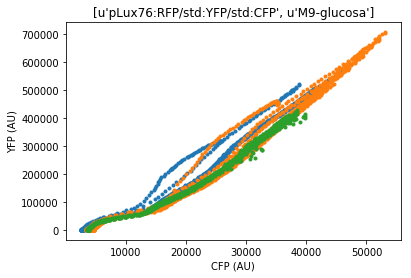

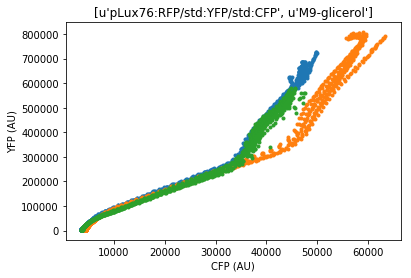

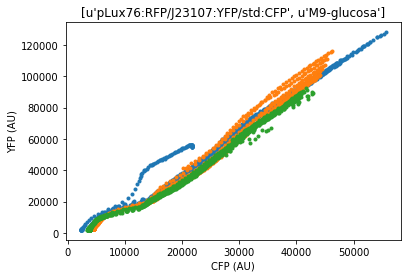

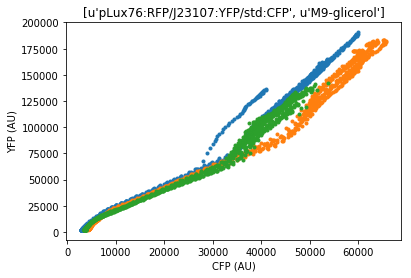

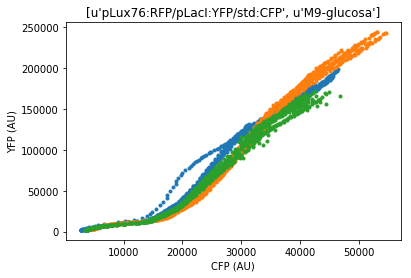

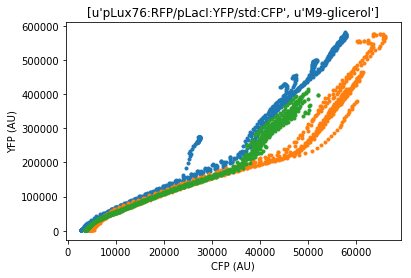

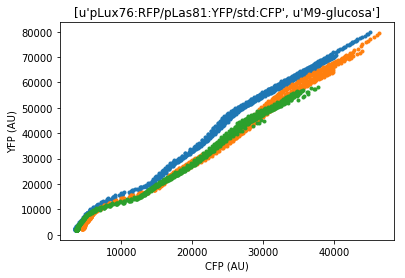

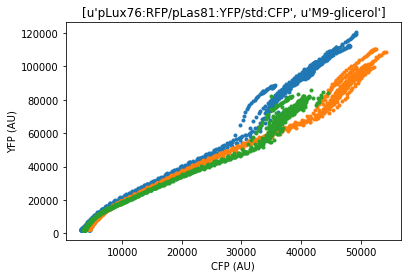

In [9]:
for p in pnames:
    for e in mednames:
        plt.figure()
        plt.title([p,e])
        plt.plot(dfexp[dfexp.samples_experiment_id==11][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_value'],dfexp[dfexp.samples_experiment_id==11][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==12][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_value'],dfexp[dfexp.samples_experiment_id==12][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==13][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_value'],dfexp[dfexp.samples_experiment_id==13][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        
        plt.xlabel('CFP (AU)')
        plt.ylabel('YFP (AU)')


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


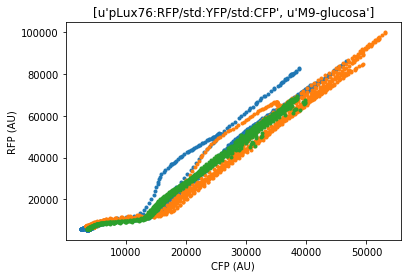

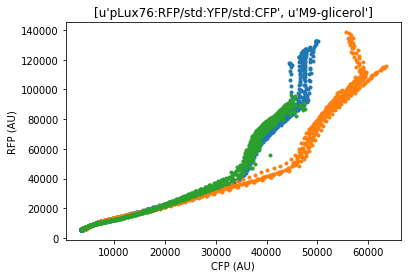

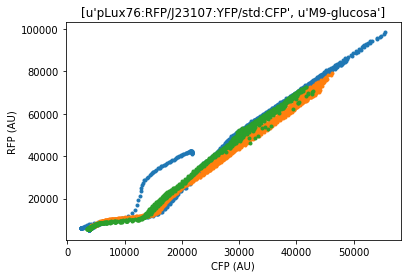

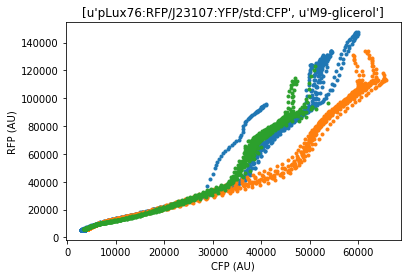

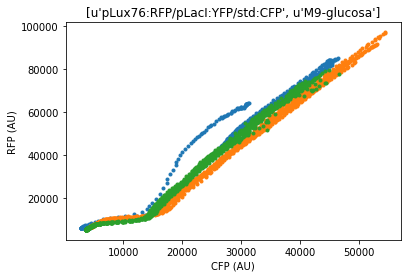

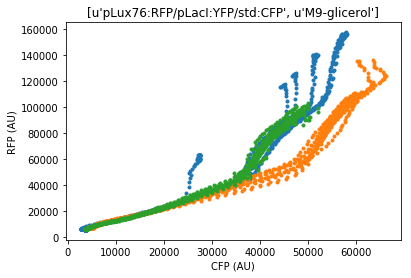

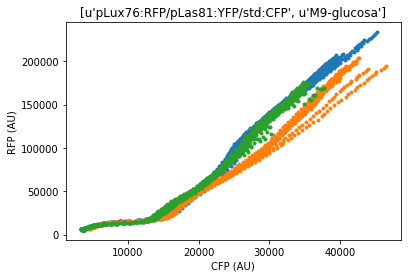

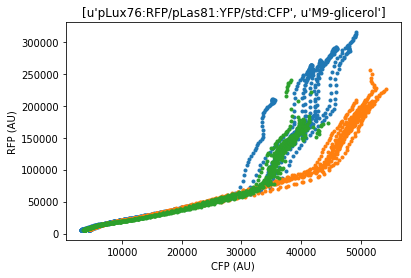

In [10]:
for p in pnames:
    for e in mednames:
        plt.figure()
        plt.title([p,e])
        plt.plot(dfexp[dfexp.samples_experiment_id==11][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_value'],dfexp[dfexp.samples_experiment_id==11][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==12][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_value'],dfexp[dfexp.samples_experiment_id==12][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==13][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_value'],dfexp[dfexp.samples_experiment_id==13][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
        
        plt.xlabel('CFP (AU)')
        plt.ylabel('RFP (AU)')


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


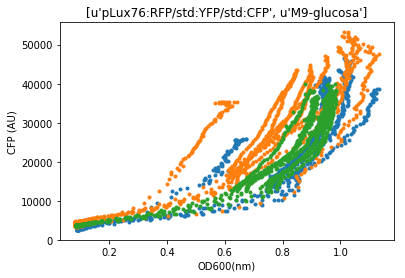

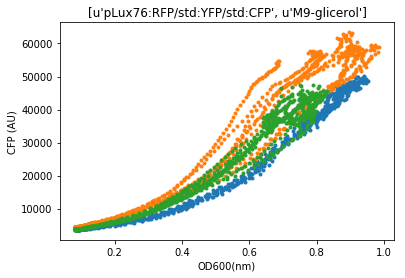

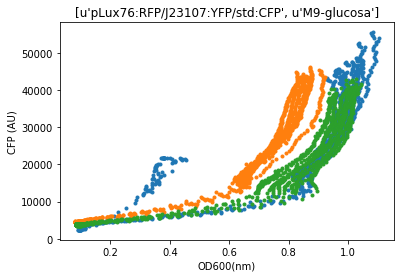

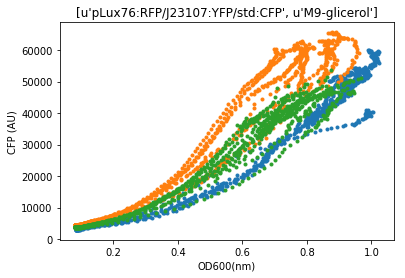

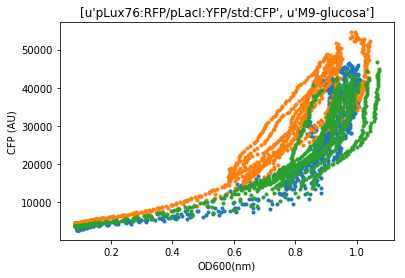

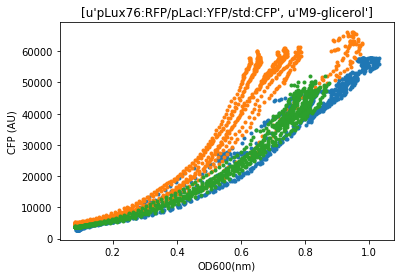

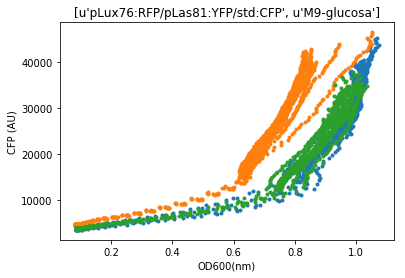

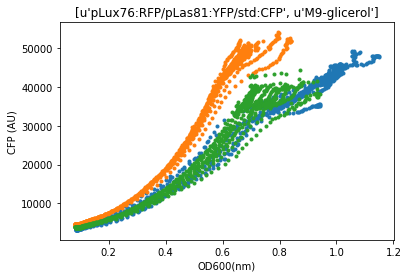

In [11]:
for p in pnames:
    for e in mednames:
        plt.figure()
        plt.title([p,e])
        plt.plot(dfexp[dfexp.samples_experiment_id==11][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='OD600:600']['measurements_value'],dfexp[dfexp.samples_experiment_id==11][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==12][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='OD600:600']['measurements_value'],dfexp[dfexp.samples_experiment_id==12][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==13][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='OD600:600']['measurements_value'],dfexp[dfexp.samples_experiment_id==13][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_value'], '.')
        
        plt.xlabel('OD600(nm)')
        plt.ylabel('CFP (AU)')


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


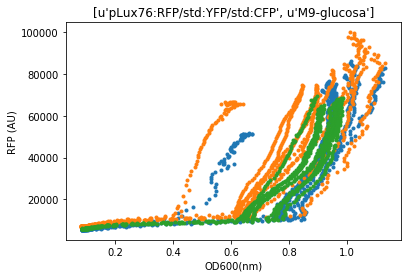

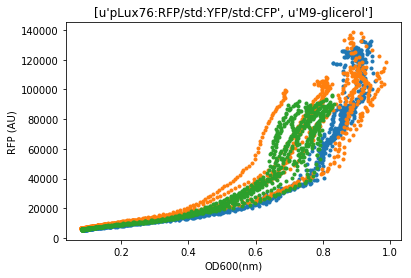

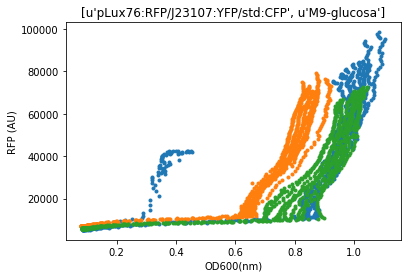

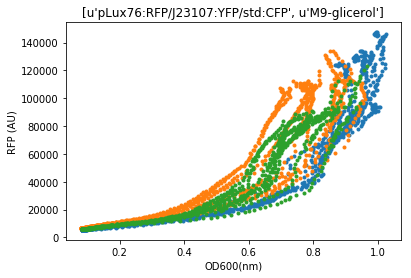

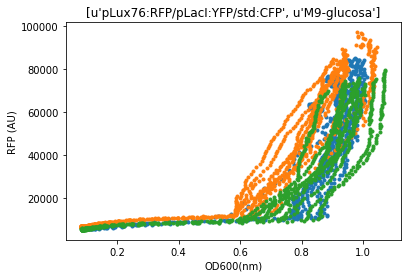

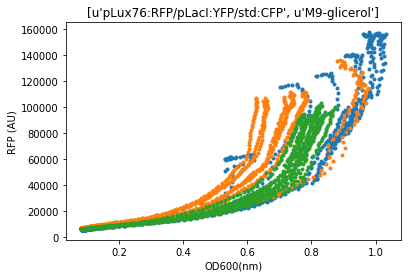

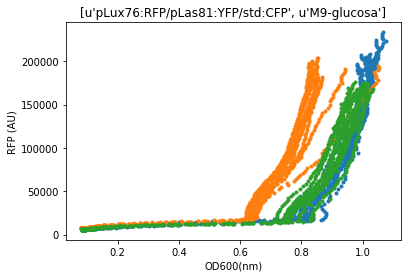

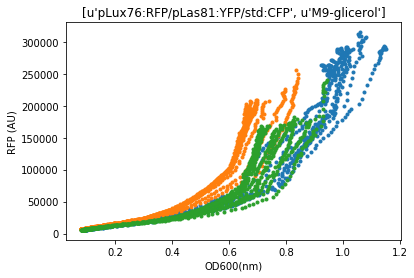

In [12]:
for p in pnames:
    for e in mednames:
        plt.figure()
        plt.title([p,e])
        plt.plot(dfexp[dfexp.samples_experiment_id==11][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='OD600:600']['measurements_value'],dfexp[dfexp.samples_experiment_id==11][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==12][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='OD600:600']['measurements_value'],dfexp[dfexp.samples_experiment_id==12][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==13][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='OD600:600']['measurements_value'],dfexp[dfexp.samples_experiment_id==13][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
        
        plt.xlabel('OD600(nm)')
        plt.ylabel('RFP (AU)')

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


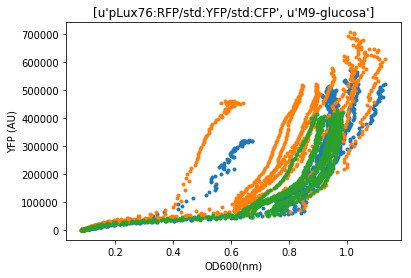

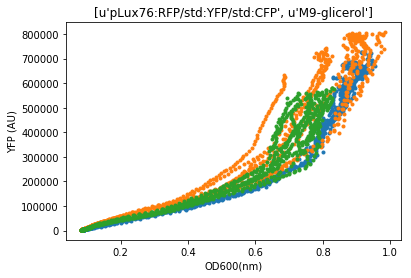

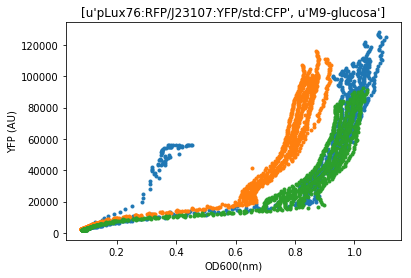

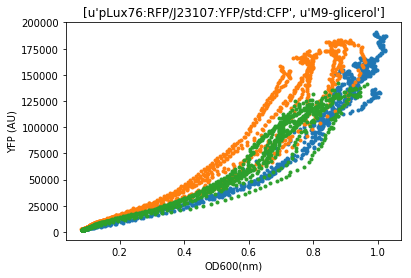

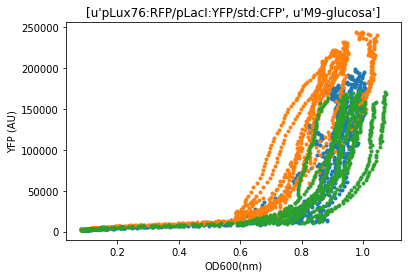

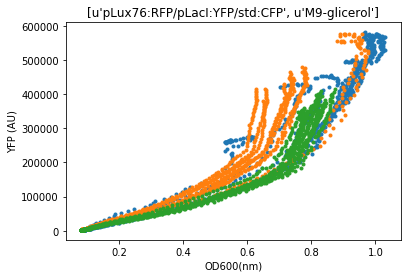

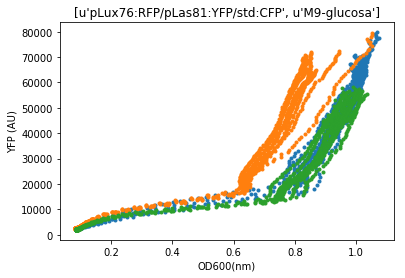

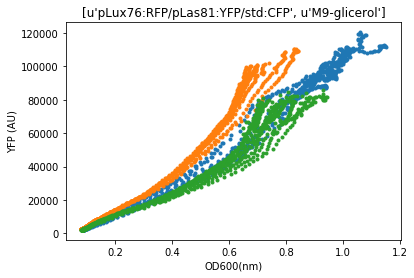

In [13]:
for p in pnames:
    for e in mednames:
        plt.figure()
        plt.title([p,e])
        plt.plot(dfexp[dfexp.samples_experiment_id==11][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='OD600:600']['measurements_value'],dfexp[dfexp.samples_experiment_id==11][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==12][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='OD600:600']['measurements_value'],dfexp[dfexp.samples_experiment_id==12][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==13][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='OD600:600']['measurements_value'],dfexp[dfexp.samples_experiment_id==13][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        
        plt.xlabel('OD600(nm)')
        plt.ylabel('YFP (AU)')

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


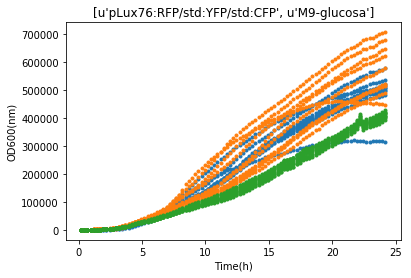

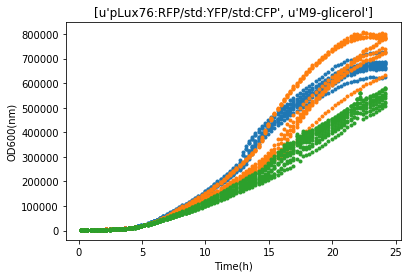

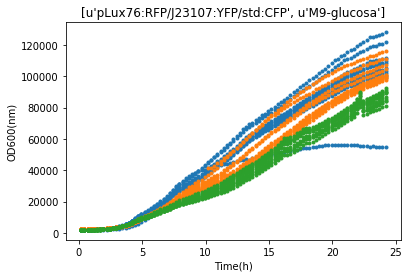

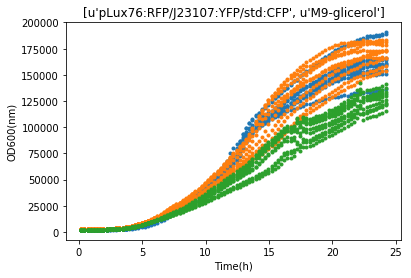

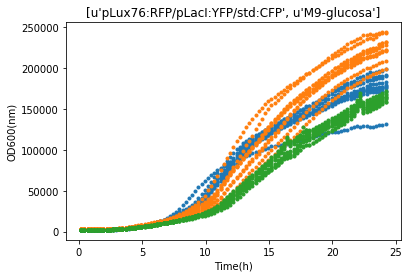

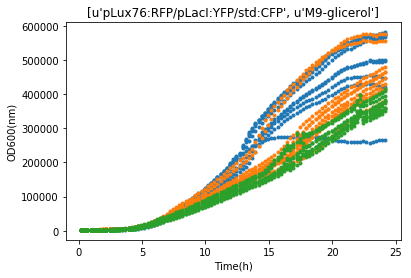

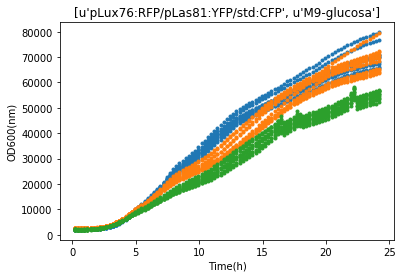

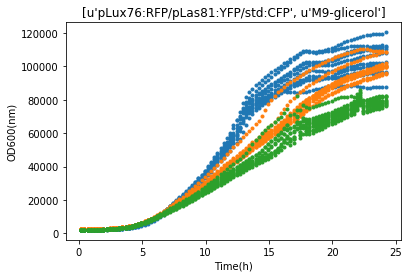

In [14]:
for p in pnames:
    for e in mednames:
        plt.figure()
        plt.title([p,e])
        plt.plot(dfexp[dfexp.samples_experiment_id==11][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='OD600:600']['measurements_time'],dfexp[dfexp.samples_experiment_id==11][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==12][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='OD600:600']['measurements_time'],dfexp[dfexp.samples_experiment_id==12][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==13][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='OD600:600']['measurements_time'],dfexp[dfexp.samples_experiment_id==13][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        
        plt.xlabel('Time(h)')
        plt.ylabel('OD600(nm)')

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


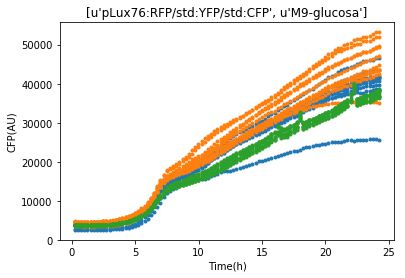

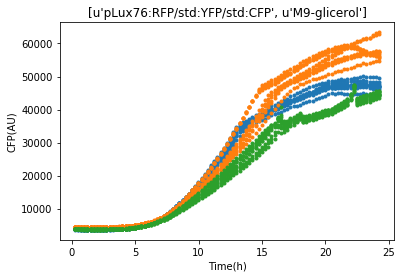

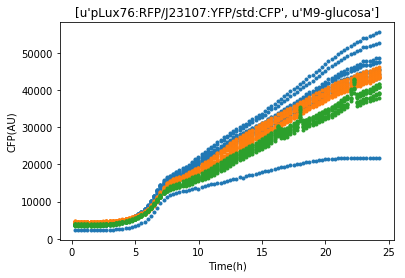

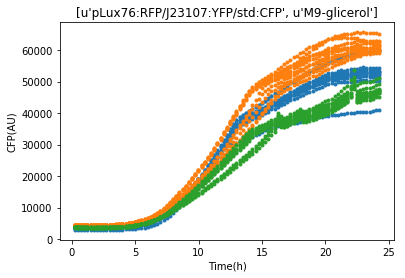

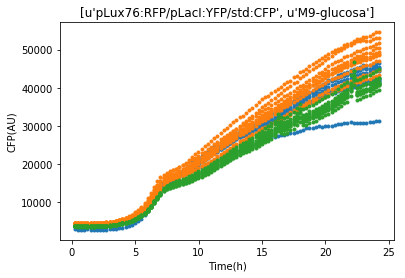

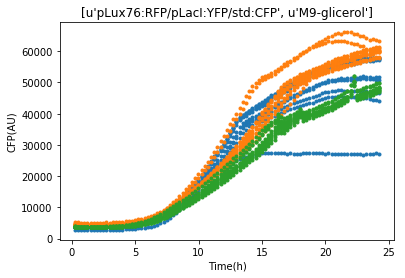

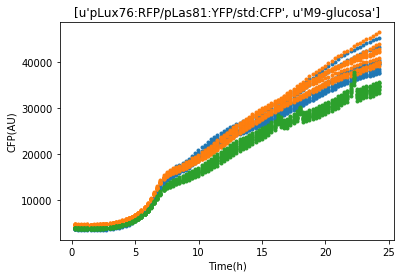

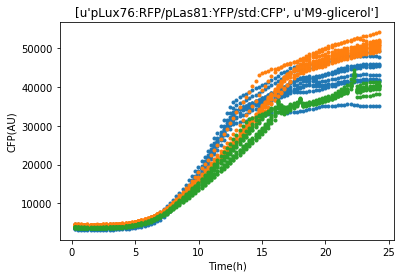

In [15]:
for p in pnames:
    for e in mednames:
        plt.figure()
        plt.title([p,e])
        plt.plot(dfexp[dfexp.samples_experiment_id==11][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_time'],dfexp[dfexp.samples_experiment_id==11][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==12][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_time'],dfexp[dfexp.samples_experiment_id==12][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==13][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_time'],dfexp[dfexp.samples_experiment_id==13][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_value'], '.')
        
        plt.xlabel('Time(h)')
        plt.ylabel('CFP(AU)')
       

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


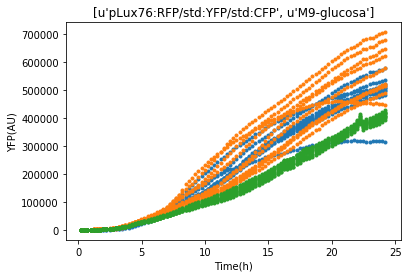

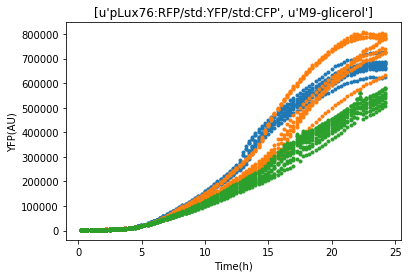

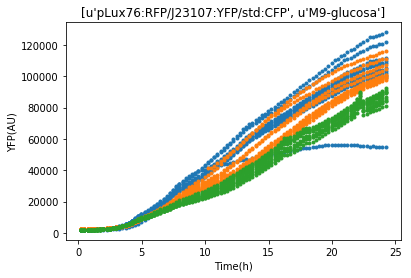

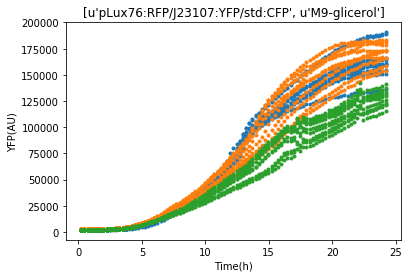

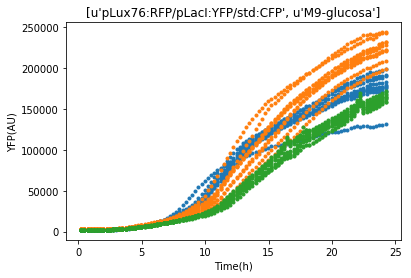

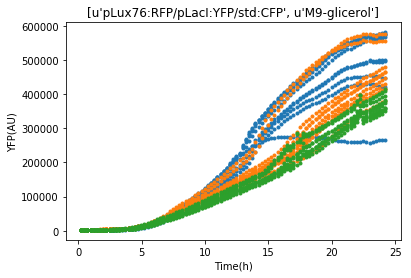

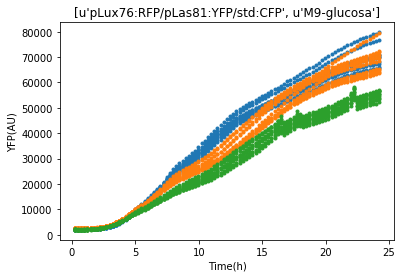

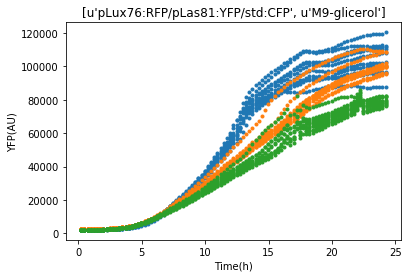

In [16]:
for p in pnames:
    for e in mednames:
        plt.figure()
        plt.title([p,e])
        plt.plot(dfexp[dfexp.samples_experiment_id==11][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_time'],dfexp[dfexp.samples_experiment_id==11][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==12][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_time'],dfexp[dfexp.samples_experiment_id==12][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==13][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_time'],dfexp[dfexp.samples_experiment_id==13][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        
        plt.xlabel('Time(h)')
        plt.ylabel('YFP(AU)')


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


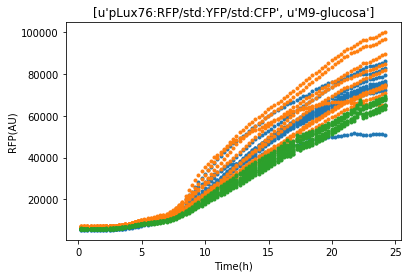

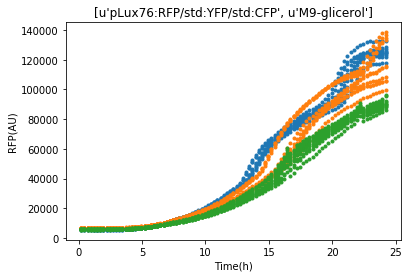

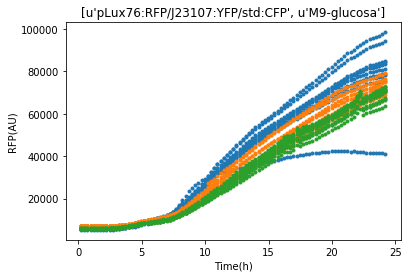

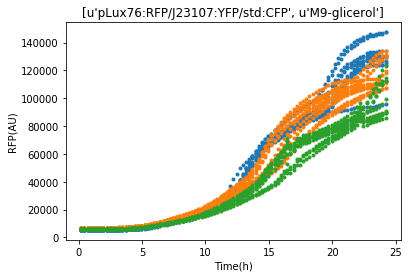

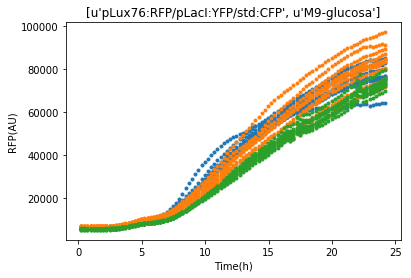

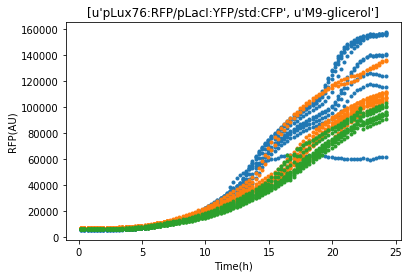

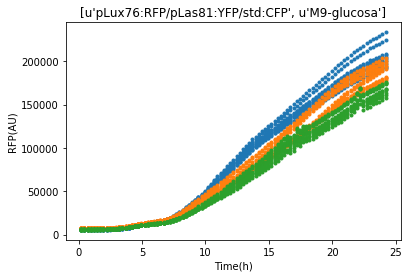

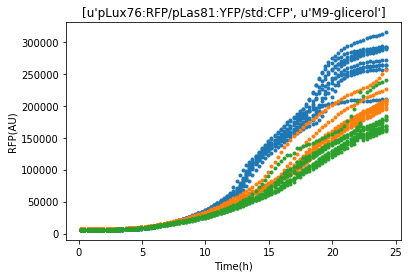

In [17]:
for p in pnames:
    for e in mednames:
        plt.figure()
        plt.title([p,e])
        plt.plot(dfexp[dfexp.samples_experiment_id==11][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_time'],dfexp[dfexp.samples_experiment_id==11][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==12][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_time'],dfexp[dfexp.samples_experiment_id==12][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==13][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_time'],dfexp[dfexp.samples_experiment_id==13][dfexp.samples_media==e][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
        
        plt.xlabel('Time(h)')
        plt.ylabel('RFP(AU)')

In [18]:
#max mediciones(no diff)
odmax = np.max(dfexp[dfexp.measurements_name=='OD600:600']['measurements_value'].values)
print odmax
yfpmax = np.max(dfexp[dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'].values)
print yfpmax
rfpmax = np.max(dfexp[dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'].values)
print rfpmax
cfpmax = np.max(dfexp[dfexp.measurements_name=='CFP:420/50,485/20']['measurements_value'].values)
print cfpmax

1.15
807399.0
314908.0
66063.0


In [19]:
measmax = {}
for e in mednames:
    for m in mnames:
        measmax[e,m] = np.max(dfexp[dfexp.measurements_name==m][dfexp.samples_media==e]['measurements_value'].values)
        print [e,m],measmax[e,m]
        print '---'


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


[u'M9-glucosa', u'OD600:600'] 1.134
---
[u'M9-glucosa', u'CFP:420/50,485/20'] 55561.0
---
[u'M9-glucosa', u'RFP-YFP:585/10,620/15'] 233554.0
---
[u'M9-glucosa', u'RFP-YFP:500/27,540/25'] 706628.0
---
[u'M9-glicerol', u'OD600:600'] 1.15
---
[u'M9-glicerol', u'CFP:420/50,485/20'] 66063.0
---
[u'M9-glicerol', u'RFP-YFP:585/10,620/15'] 314908.0
---
[u'M9-glicerol', u'RFP-YFP:500/27,540/25'] 807399.0
---


In [20]:
ddif={}
for p in pnames:
    for m in mnames:
        for e in mednames:
            dfe=dfexp[dfexp.measurements_name==m][dfexp.samples_media==e][dfexp.plasmids_name==p]
            ddif[p,m,e]=analysis.compute_measurement_diff(dfe,m)
            print [p,m,e],ddif[p,m,e]
            print'---'

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


[u'pLux76:RFP/std:YFP/std:CFP', u'OD600:600', u'M9-glucosa'] [ 0.     0.     0.    ...,  0.003  0.003  0.001]
---
[u'pLux76:RFP/std:YFP/std:CFP', u'OD600:600', u'M9-glicerol'] [ 0.     0.    -0.001 ...,  0.002  0.003  0.001]
---
[u'pLux76:RFP/std:YFP/std:CFP', u'CFP:420/50,485/20', u'M9-glucosa'] [   0.    0.  -49. ...,  392.  457.  331.]
---
[u'pLux76:RFP/std:YFP/std:CFP', u'CFP:420/50,485/20', u'M9-glicerol'] [   0.    0.  -53. ...,  373.  498.  340.]
---
[u'pLux76:RFP/std:YFP/std:CFP', u'RFP-YFP:585/10,620/15', u'M9-glucosa'] [   0.    0.  -28. ...,  898.  742.  768.]
---
[u'pLux76:RFP/std:YFP/std:CFP', u'RFP-YFP:585/10,620/15', u'M9-glicerol'] [   0.    0.  -44. ...,  850.  753.  947.]
---
[u'pLux76:RFP/std:YFP/std:CFP', u'RFP-YFP:500/27,540/25', u'M9-glucosa'] [    0.     0.    70. ...,  5751.  5598.  6543.]
---
[u'pLux76:RFP/std:YFP/std:CFP', u'RFP-YFP:500/27,540/25', u'M9-glicerol'] [    0.     0.   144. ...,  8058.  6348.  8380.]
---
[u'pLux76:RFP/J23107:YFP/std:CFP', u'OD600:6

In [21]:
measdiffsss = {}

print pnames[0]
for m in mnames:
    for e in mednames:
        measdiffsss[e,m] =analysis.compute_measurement_diff(dfsss[dfsss.measurements_name==m][dfsss.samples_media==e],m)
        print [e,m],measdiffsss[e,m]
        
sssdiff=measdiffsss

print'----'
print pnames[1]
measdiffpss = {}

for e in mednames:
    for m in mnames:
        measdiffpss[e,m] =analysis.compute_measurement_diff(dfpss[dfpss.measurements_name==m][dfpss.samples_media==e],m)
        print [e,m],measdiffpss[e,m]  
#print measdiffpss
pssdiff=measdiffpss

print'----'
print pnames[2]
measdiffpts = {}

for e in mednames:
    for m in mnames:
        measdiffpts[e,m] =analysis.compute_measurement_diff(dfpts[dfpts.measurements_name==m][dfpts.samples_media==e],m)
        print [e,m],measdiffpts[e,m]
        
ptsdiff=measdiffpts

print'----'
print pnames[3]
measdiffpls = {}

for e in mednames:
    for m in mnames:
        measdiffpls[e,m] =analysis.compute_measurement_diff(dfpls[dfpls.measurements_name==m][dfpls.samples_media==e],m)
        print [e,m],measdiffpls[e,m]   
    
#print measdiffpls
plsdiff=measdiffpls

diffs=[measdiffsss,measdiffpss,measdiffpts,measdiffpls]



pLux76:RFP/std:YFP/std:CFP


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


[u'M9-glucosa', u'OD600:600'] [ 0.     0.     0.    ...,  0.003  0.003  0.001]
[u'M9-glicerol', u'OD600:600'] [ 0.     0.    -0.001 ...,  0.002  0.003  0.001]
[u'M9-glucosa', u'CFP:420/50,485/20'] [   0.    0.  -49. ...,  392.  457.  331.]
[u'M9-glicerol', u'CFP:420/50,485/20'] [   0.    0.  -53. ...,  373.  498.  340.]
[u'M9-glucosa', u'RFP-YFP:585/10,620/15'] [   0.    0.  -28. ...,  898.  742.  768.]
[u'M9-glicerol', u'RFP-YFP:585/10,620/15'] [   0.    0.  -44. ...,  850.  753.  947.]
[u'M9-glucosa', u'RFP-YFP:500/27,540/25'] [    0.     0.    70. ...,  5751.  5598.  6543.]
[u'M9-glicerol', u'RFP-YFP:500/27,540/25'] [    0.     0.   144. ...,  8058.  6348.  8380.]
----
pLux76:RFP/J23107:YFP/std:CFP
[u'M9-glucosa', u'OD600:600'] 

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


[ 0.     0.     0.    ...,  0.004  0.005  0.001]
[u'M9-glucosa', u'CFP:420/50,485/20'] [   0.    0.  -83. ...,  532.  531.  417.]
[u'M9-glucosa', u'RFP-YFP:585/10,620/15'] [   0.    0.  -65. ...,  528.  851.  692.]
[u'M9-glucosa', u'RFP-YFP:500/27,540/25'] [    0.     0.   -14. ...,   904.  1283.  1248.]
[u'M9-glicerol', u'OD600:600'] [ 0.     0.     0.    ...,  0.008  0.005  0.002]
[u'M9-glicerol', u'CFP:420/50,485/20'] [   0.    0.  -52. ...,  324.  429.   27.]
[u'M9-glicerol', u'RFP-YFP:585/10,620/15'] [    0.     0.   -31. ...,  2957.  2084.  2086.]
[u'M9-glicerol', u'RFP-YFP:500/27,540/25'] [    0.     0.    27. ...,  1143.  1156.   542.]
----
pLux76:RFP/pLacI:YFP/std:CFP


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


[u'M9-glucosa', u'OD600:600'] [ 0.     0.     0.    ...,  0.002  0.004 -0.001]
[u'M9-glucosa', u'CFP:420/50,485/20'] [   0.    0.  -60. ...,  437.  566.  524.]
[u'M9-glucosa', u'RFP-YFP:585/10,620/15'] [   0.    0.   -3. ...,  793.  907.  862.]
[u'M9-glucosa', u'RFP-YFP:500/27,540/25'] [    0.     0.   -17. ...,  2208.  2879.  2547.]
[u'M9-glicerol', u'OD600:600'] [ 0.     0.     0.    ...,  0.005  0.     0.001]
[u'M9-glicerol', u'CFP:420/50,485/20'] [   0.    0.  -58. ...,  463.  459.  352.]
[u'M9-glicerol', u'RFP-YFP:585/10,620/15'] [    0.     0.    14. ...,  1234.   796.  1220.]
[u'M9-glicerol', u'RFP-YFP:500/27,540/25'] [    0.     0.    30. ...,  6094.  4572.  6921.]
----
pLux76:RFP/pLas81:YFP/std:CFP


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


[u'M9-glucosa', u'OD600:600'] [ 0.     0.     0.    ...,  0.003  0.003  0.002]
[u'M9-glucosa', u'CFP:420/50,485/20'] [   0.    0. -101. ...,  301.  371.  303.]
[u'M9-glucosa', u'RFP-YFP:585/10,620/15'] [    0.     0.   -17. ...,  2554.  1995.  2108.]
[u'M9-glucosa', u'RFP-YFP:500/27,540/25'] [   0.    0.   11. ...,  316.  459.  524.]
[u'M9-glicerol', u'OD600:600'] [ 0.     0.     0.    ...,  0.002  0.017  0.015]
[u'M9-glicerol', u'CFP:420/50,485/20'] [  0.   0. -59. ...,  33.   1. -26.]
[u'M9-glicerol', u'RFP-YFP:585/10,620/15'] [    0.     0.   -12. ...,  2296.  2629.  4212.]
[u'M9-glicerol', u'RFP-YFP:500/27,540/25'] [   0.    0.  -25. ...,  518.  -99.  203.]


In [22]:
#max de diffs para rangos de H(x)
diffod={}
maxod={}
for e in mednames:
    for m in mnames:
        diffod[e,m] =analysis.compute_measurement_diff(dfexp[dfexp.measurements_name==m][dfexp.samples_media==e],m)
        maxod[e,m]=np.max(diffod[e,m])
        print [e,m],maxod[e,m]

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


[u'M9-glucosa', u'OD600:600'] 0.115
[u'M9-glucosa', u'CFP:420/50,485/20'] 3845.0
[u'M9-glucosa', u'RFP-YFP:585/10,620/15'] 9650.0
[u'M9-glucosa', u'RFP-YFP:500/27,540/25'] 19410.0
[u'M9-glicerol', u'OD600:600'] 0.049
[u'M9-glicerol', u'CFP:420/50,485/20'] 3155.0
[u'M9-glicerol', u'RFP-YFP:585/10,620/15'] 13091.0
[u'M9-glicerol', u'RFP-YFP:500/27,540/25'] 41175.0


In [23]:
#max de diffs para rangos de H(x)
diffod={}
maxod={}
for m in mednames:
    diffod[m] =analysis.compute_measurement_diff(dfexp[dfexp.samples_media==m],'OD600:600')
    maxod[m]=np.max(diffod[m])
    
print maxod

diffrfp={}
maxrfp={}
for m in mednames:
    diffrfp[m] =analysis.compute_measurement_diff(dfexp[dfexp.samples_media==m],'RFP-YFP:585/10,620/15')
    maxrfp[m]=np.max(diffrfp[m])
    
print maxrfp

diffyfp={}
maxyfp={}
for m in mednames:
    diffyfp[m] =analysis.compute_measurement_diff(dfexp[dfexp.samples_media==m],'RFP-YFP:500/27,540/25')
    maxyfp[m]=np.max(diffyfp[m])
    
print maxyfp

diffcfp={}
maxcfp={}
for m in mednames:
    diffcfp[m] =analysis.compute_measurement_diff(dfexp[dfexp.samples_media==m],'CFP:420/50,485/20')
    maxcfp[m]=np.max(diffcfp[m])
    
print maxcfp



{u'M9-glicerol': 0.048999999999999988, u'M9-glucosa': 0.11499999999999999}
{u'M9-glicerol': 13091.0, u'M9-glucosa': 9650.0}
{u'M9-glicerol': 41175.0, u'M9-glucosa': 19410.0}
{u'M9-glicerol': 3155.0, u'M9-glucosa': 3845.0}


In [24]:
Hod={}
Hcfp={}
Hrfp={}
Hyfp={}
for p in pnames:
    for m in mnames:
        for e in mednames:
            if m=='OD600:600':
                Hod[p,m,e] =analysis.channel_entropy(dfexp[dfexp.measurements_name==m][dfexp.samples_media==e][dfexp.plasmids_name==p],m, 256, [0,0.14])
                     
            elif m=='RFP-YFP:585/10,620/15':
                Hrfp[p,m,e] = analysis.channel_entropy(dfexp[dfexp.measurements_name==m][dfexp.samples_media==e][dfexp.plasmids_name==p],m, 256, [0,30900])
                      
            elif m=='RFP-YFP:500/27,540/25':
                Hyfp[p,m,e] = analysis.channel_entropy(dfexp[dfexp.measurements_name==m][dfexp.samples_media==e][dfexp.plasmids_name==p],m, 256, [0,79100])
                           
            else:
                Hcfp[p,m,e] = analysis.channel_entropy(dfexp[dfexp.measurements_name==m][dfexp.samples_media==e][dfexp.plasmids_name==p],m, 256, [0,3700])
                


print 'Entropy of OD', Hod
print 'Entropy of RFP', Hrfp           
print 'Entropy of YFP', Hyfp                
print 'Entropy of CFP', Hcfp


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


Entropy of OD {(u'pLux76:RFP/std:YFP/std:CFP', u'OD600:600', u'M9-glucosa'): 4.7350264, (u'pLux76:RFP/pLacI:YFP/std:CFP', u'OD600:600', u'M9-glicerol'): 4.5902262, (u'pLux76:RFP/pLacI:YFP/std:CFP', u'OD600:600', u'M9-glucosa'): 4.8361096, (u'pLux76:RFP/pLas81:YFP/std:CFP', u'OD600:600', u'M9-glucosa'): 4.4920349, (u'pLux76:RFP/std:YFP/std:CFP', u'OD600:600', u'M9-glicerol'): 4.6323242, (u'pLux76:RFP/pLas81:YFP/std:CFP', u'OD600:600', u'M9-glicerol'): 4.5328212, (u'pLux76:RFP/J23107:YFP/std:CFP', u'OD600:600', u'M9-glicerol'): 4.7350349, (u'pLux76:RFP/J23107:YFP/std:CFP', u'OD600:600', u'M9-glucosa'): 4.6190643}
Entropy of RFP {(u'pLux76:RFP/std:YFP/std:CFP', u'RFP-YFP:585/10,620/15', u'M9-glicerol'): 4.6518235, (u'pLux76:RFP/pLacI:YFP/std:CFP', u'RFP-YFP:585/10,620/15', u'M9-glucosa'): 3.822453, (u'pLux76:RFP/pLas81:YFP/std:CFP', u'RFP-YFP:585/10,620/15', u'M9-glicerol'): 5.5858831, (u'pLux76:RFP/pLacI:YFP/std:CFP', u'RFP-YFP:585/10,620/15', u'M9-glicerol'): 4.6900187, (u'pLux76:RFP/st

In [25]:
Hodsss={}
Hcfpsss={}
Hrfpsss={}
Hyfpsss={}

for m in mnames:
    for e in mednames:
        if m=='OD600:600':
            Hodsss[m,e] =analysis.channel_entropy(dfsss[dfsss.measurements_name==m][dfsss.samples_media==e],m, 256, [0,0.14])

        elif m=='RFP-YFP:585/10,620/15':
            Hrfpsss[m,e] = analysis.channel_entropy(dfsss[dfsss.measurements_name==m][dfsss.samples_media==e],m, 256, [0,30900])
            
        elif m=='RFP-YFP:500/27,540/25':
            Hyfpsss[m,e] = analysis.channel_entropy(dfsss[dfsss.measurements_name==m][dfsss.samples_media==e],m, 256, [0,79100])
                    
        else:
            Hcfpsss[m,e] = analysis.channel_entropy(dfsss[dfsss.measurements_name==m][dfsss.samples_media==e],m, 256, [0,3700])
                    


print pnames[0]
print 'Entropy of OD', Hodsss
print '---'                                                    
print ' ' 
print 'Entropy of CFP', Hcfpsss
print '---' 
print ' ' 
print 'Entropy of RFP', Hrfpsss
print '---'  
print ' ' 
print 'Entropy of YFP', Hyfpsss
print '---'                        

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


pLux76:RFP/std:YFP/std:CFP
Entropy of OD {(u'OD600:600', u'M9-glicerol'): 4.6323242, (u'OD600:600', u'M9-glucosa'): 4.7350264}
---
 
Entropy of CFP {(u'CFP:420/50,485/20', u'M9-glucosa'): 5.9754815, (u'CFP:420/50,485/20', u'M9-glicerol'): 6.5907722}
---
 
Entropy of RFP {(u'RFP-YFP:585/10,620/15', u'M9-glucosa'): 3.7449856, (u'RFP-YFP:585/10,620/15', u'M9-glicerol'): 4.6518235}
---
 
Entropy of YFP {(u'RFP-YFP:500/27,540/25', u'M9-glucosa'): 5.132164, (u'RFP-YFP:500/27,540/25', u'M9-glicerol'): 5.6888566}
---


In [26]:
Hodpss={}
Hcfppss={}
Hrfppss={}
Hyfppss={}

for m in mnames:
    for e in mednames:
        if m=='OD600:600':
            Hodpss[m,e] =analysis.channel_entropy(dfpss[dfpss.measurements_name==m][dfpss.samples_media==e],m, 256, [0,0.14])

        elif m=='RFP-YFP:585/10,620/15':
            Hrfppss[m,e] = analysis.channel_entropy(dfpss[dfpss.measurements_name==m][dfpss.samples_media==e],m, 256, [0,30900])
            
        elif m=='RFP-YFP:500/27,540/25':
            Hyfppss[m,e] = analysis.channel_entropy(dfpss[dfpss.measurements_name==m][dfpss.samples_media==e],m, 256, [0,79100])
                    
        else:
            Hcfppss[m,e] = analysis.channel_entropy(dfpss[dfpss.measurements_name==m][dfpss.samples_media==e],m, 256, [0,3700])
                    


print pnames[1]
print 'Entropy of OD', Hodpss
print '---'                                                    
print ' ' 
print 'Entropy of CFP', Hcfppss
print '---' 
print ' ' 
print 'Entropy of RFP', Hrfppss
print '---'  
print ' ' 
print 'Entropy of YFP', Hyfppss
print '---'                                   

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


pLux76:RFP/J23107:YFP/std:CFP
Entropy of OD {(u'OD600:600', u'M9-glicerol'): 4.7350349, (u'OD600:600', u'M9-glucosa'): 4.6190643}
---
 
Entropy of CFP {(u'CFP:420/50,485/20', u'M9-glucosa'): 5.9767656, (u'CFP:420/50,485/20', u'M9-glicerol'): 6.6840944}
---
 
Entropy of RFP {(u'RFP-YFP:585/10,620/15', u'M9-glucosa'): 3.6766341, (u'RFP-YFP:585/10,620/15', u'M9-glicerol'): 4.7177296}
---
 
Entropy of YFP {(u'RFP-YFP:500/27,540/25', u'M9-glucosa'): 2.6645527, (u'RFP-YFP:500/27,540/25', u'M9-glicerol'): 3.7181501}
---


In [27]:
Hodpts={}
Hcfppts={}
Hrfppts={}
Hyfppts={}

for m in mnames:
    for e in mednames:
        if m=='OD600:600':
            Hodpts[m,e] =analysis.channel_entropy(dfpts[dfpts.measurements_name==m][dfpts.samples_media==e],m, 256, [0,0.14])

        elif m=='RFP-YFP:585/10,620/15':
            Hrfppts[m,e] = analysis.channel_entropy(dfpts[dfpts.measurements_name==m][dfpts.samples_media==e],m, 256, [0,30900])
            
        elif m=='RFP-YFP:500/27,540/25':
            Hyfppts[m,e] = analysis.channel_entropy(dfpts[dfpts.measurements_name==m][dfpts.samples_media==e],m, 256, [0,79100])
                    
        else:
            Hcfppts[m,e] = analysis.channel_entropy(dfpts[dfpts.measurements_name==m][dfpts.samples_media==e],m, 256, [0,3700])
                    


print pnames[2]
print 'Entropy of OD', Hodpts
print '---'                                                    
print ' ' 
print 'Entropy of CFP', Hcfppts
print '---' 
print ' ' 
print 'Entropy of RFP', Hrfppts
print '---'  
print ' ' 
print 'Entropy of YFP', Hyfppts
print '---'                                   

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


pLux76:RFP/pLacI:YFP/std:CFP
Entropy of OD {(u'OD600:600', u'M9-glicerol'): 4.5902262, (u'OD600:600', u'M9-glucosa'): 4.8361096}
---
 
Entropy of CFP {(u'CFP:420/50,485/20', u'M9-glucosa'): 6.0493331, (u'CFP:420/50,485/20', u'M9-glicerol'): 6.6795568}
---
 
Entropy of RFP {(u'RFP-YFP:585/10,620/15', u'M9-glucosa'): 3.822453, (u'RFP-YFP:585/10,620/15', u'M9-glicerol'): 4.6900187}
---
 
Entropy of YFP {(u'RFP-YFP:500/27,540/25', u'M9-glucosa'): 4.092114, (u'RFP-YFP:500/27,540/25', u'M9-glicerol'): 5.0617127}
---


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [28]:
Hodpls={}
Hcfppls={}
Hrfppls={}
Hyfppls={}

for m in mnames:
    for e in mednames:
        if m=='OD600:600':
            Hodpls[m,e] =analysis.channel_entropy(dfpls[dfpls.measurements_name==m][dfpls.samples_media==e],m, 256, [0,0.14])

        elif m=='RFP-YFP:585/10,620/15':
            Hrfppls[m,e] = analysis.channel_entropy(dfpls[dfpls.measurements_name==m][dfpls.samples_media==e],m, 256, [0,30900])
            
        elif m=='RFP-YFP:500/27,540/25':
            Hyfppls[m,e] = analysis.channel_entropy(dfpls[dfpls.measurements_name==m][dfpls.samples_media==e],m, 256, [0,79100])
                    
        else:
            Hcfppls[m,e] = analysis.channel_entropy(dfpls[dfpls.measurements_name==m][dfpls.samples_media==e],m, 256, [0,3700])
                    


print pnames[3]
print 'Entropy of OD', Hodpls
print '---'                                                    
print ' ' 
print 'Entropy of CFP', Hcfppls
print '---' 
print ' ' 
print 'Entropy of RFP', Hrfppls
print '---'  
print ' ' 
print 'Entropy of YFP', Hyfppls
print '---'                                   

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


pLux76:RFP/pLas81:YFP/std:CFP
Entropy of OD {(u'OD600:600', u'M9-glicerol'): 4.5328212, (u'OD600:600', u'M9-glucosa'): 4.4920349}
---
 
Entropy of CFP {(u'CFP:420/50,485/20', u'M9-glucosa'): 5.809391, (u'CFP:420/50,485/20', u'M9-glicerol'): 6.4487481}
---
 
Entropy of RFP {(u'RFP-YFP:585/10,620/15', u'M9-glucosa'): 4.9321666, (u'RFP-YFP:585/10,620/15', u'M9-glicerol'): 5.5858831}
---
 
Entropy of YFP {(u'RFP-YFP:500/27,540/25', u'M9-glucosa'): 2.1646345, (u'RFP-YFP:500/27,540/25', u'M9-glicerol'): 3.0713844}
---


In [29]:
def channel_entropies(df):
    # Calculate the entropies of all channels in the dataframe df
    Ho= {}
    Hr= {}
    Hy= {}
    Hc= {}
    
    mnames = df.measurements_name.unique()
    pnames = df.plasmids_name.unique()
    mednames = df.samples_media.unique()
    for p in pnames:
        for e in mednames:
            for m in mnames:
                if m=='OD600:600':
                    Ho[p,m,e] =analysis.channel_entropy(df[df.measurements_name==m][df.samples_media==e][df.plasmids_name==p],m, 256, [0,0.14])
                    
                else:
                    if m=='RFP-YFP:585/10,620/15':
                        Hr[p,m,e] = analysis.channel_entropy(df[df.measurements_name==m][df.samples_media==e][df.plasmids_name==p],m, 256, [0,30900])
                        
                    else:
                        if m=='RFP-YFP:500/27,540/25':
                            Hy[p,m,e] = analysis.channel_entropy(df[df.measurements_name==m][df.samples_media==e][df.plasmids_name==p],m, 256, [0,79100])
                            
                        else:
                            Hc[p,m,e] = analysis.channel_entropy(df[df.measurements_name==m][df.samples_media==e][df.plasmids_name==p],m, 256, [0,3700])
                            
    print Ho
    print' '
    print '---'
    print' '
    print Hc
    print' '
    print '---'
    print' '
    print Hr
    print' '
    print '---'
    print' '
    print Hy 
    


Hexp= channel_entropies(dfexp)
print Hexp


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


{(u'pLux76:RFP/std:YFP/std:CFP', u'OD600:600', u'M9-glucosa'): 4.7350264, (u'pLux76:RFP/pLacI:YFP/std:CFP', u'OD600:600', u'M9-glicerol'): 4.5902262, (u'pLux76:RFP/pLacI:YFP/std:CFP', u'OD600:600', u'M9-glucosa'): 4.8361096, (u'pLux76:RFP/pLas81:YFP/std:CFP', u'OD600:600', u'M9-glucosa'): 4.4920349, (u'pLux76:RFP/std:YFP/std:CFP', u'OD600:600', u'M9-glicerol'): 4.6323242, (u'pLux76:RFP/pLas81:YFP/std:CFP', u'OD600:600', u'M9-glicerol'): 4.5328212, (u'pLux76:RFP/J23107:YFP/std:CFP', u'OD600:600', u'M9-glicerol'): 4.7350349, (u'pLux76:RFP/J23107:YFP/std:CFP', u'OD600:600', u'M9-glucosa'): 4.6190643}
 
---
 
{(u'pLux76:RFP/std:YFP/std:CFP', u'CFP:420/50,485/20', u'M9-glicerol'): 6.5907722, (u'pLux76:RFP/pLacI:YFP/std:CFP', u'CFP:420/50,485/20', u'M9-glucosa'): 6.0493331, (u'pLux76:RFP/pLas81:YFP/std:CFP', u'CFP:420/50,485/20', u'M9-glicerol'): 6.4487481, (u'pLux76:RFP/pLacI:YFP/std:CFP', u'CFP:420/50,485/20', u'M9-glicerol'): 6.6795568, (u'pLux76:RFP/std:YFP/std:CFP', u'CFP:420/50,485/20'

In [30]:
'''def channel_conditional_entropy(df, m1, m2, nbins, hrange):
    # Compute the conditional entropy H(m2|m1),
    # where m1 and m2 are the names of the measurements
    # Get the diffs
    values1 = compute_measurement_diff(df, m1)
    values2 = compute_measurement_diff(df, m2)
    # Compute the entropy
    density2d = prob_density2d(values1, values2, nbins, hrange)
    return conditional_entropy(density2d)'''



Hyo=analysis.channel_conditional_entropy(dfsss, 'OD600:600', 'RFP-YFP:500/27,540/25',[256,256], [[0,0.14],[0,79100]])
print 'H(dY|dlogOD)=',Hyo

print mnames

H(dY|dlogOD)= 4.6279
[u'OD600:600' u'CFP:420/50,485/20' u'RFP-YFP:585/10,620/15'
 u'RFP-YFP:500/27,540/25']


In [31]:
Hcosss={}
Hrosss={}
Hyosss={}
for e in mednames:
    Hcosss[e]=analysis.channel_conditional_entropy(dfsss[dfsss.samples_media==e], 'OD600:600','CFP:420/50,485/20',[256,256], [[0,0.14],[0,3700]])
    Hrosss[e]=analysis.channel_conditional_entropy(dfsss[dfsss.samples_media==e], 'OD600:600', 'RFP-YFP:585/10,620/15',[256,256], [[0,0.14],[0,30900]])
    Hyosss[e]=analysis.channel_conditional_entropy(dfsss[dfsss.samples_media==e], 'OD600:600', 'RFP-YFP:500/27,540/25',[256,256], [[0,0.14],[0,79100]])
    print pnames[0]
    print 'H(dC|dlogOD)=',[e],Hcosss[e]
    print 'H(dRC|dlogOD)=',[e],Hrosss[e]
    print 'H(dY|dlogOD)=',[e],Hyosss[e]
    print '---'
    print ' '
                
              

pLux76:RFP/std:YFP/std:CFP
H(dC|dlogOD)= [u'M9-glucosa'] 4.69556
H(dRC|dlogOD)= [u'M9-glucosa'] 2.99107
H(dY|dlogOD)= [u'M9-glucosa'] 4.17247
---
 
pLux76:RFP/std:YFP/std:CFP
H(dC|dlogOD)= [u'M9-glicerol'] 5.15082
H(dRC|dlogOD)= [u'M9-glicerol'] 3.64702
H(dY|dlogOD)= [u'M9-glicerol'] 4.40295
---
 


In [32]:
Hco={}
Hro={}
Hyo={}
for p in pnames:
    for e in mednames:
        Hco[p,e]=analysis.channel_conditional_entropy(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'OD600:600','CFP:420/50,485/20',[256,256], [[0,0.14],[0,3700]])
        Hro[p,e]=analysis.channel_conditional_entropy(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'OD600:600', 'RFP-YFP:585/10,620/15',[256,256], [[0,0.14],[0,30900]])
        Hyo[p,e]=analysis.channel_conditional_entropy(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'OD600:600', 'RFP-YFP:500/27,540/25',[256,256], [[0,0.14],[0,79100]])
        print 'H(dC|dlogOD)=',[p,e],Hco[p,e]
        print 'H(dR|dlogOD)=',[p,e],Hro[p,e]
        print 'H(dY|dlogOD)=',[p,e],Hyo[p,e]
        print '---'
        print ' '
                
                

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


H(dC|dlogOD)= [u'pLux76:RFP/std:YFP/std:CFP', u'M9-glucosa'] 4.69556
H(dR|dlogOD)= [u'pLux76:RFP/std:YFP/std:CFP', u'M9-glucosa'] 2.99107
H(dY|dlogOD)= [u'pLux76:RFP/std:YFP/std:CFP', u'M9-glucosa'] 4.17247
---
 
H(dC|dlogOD)= [u'pLux76:RFP/std:YFP/std:CFP', u'M9-glicerol'] 5.15082
H(dR|dlogOD)= [u'pLux76:RFP/std:YFP/std:CFP', u'M9-glicerol'] 3.64702
H(dY|dlogOD)= [u'pLux76:RFP/std:YFP/std:CFP', u'M9-glicerol'] 4.40295
---
 
H(dC|dlogOD)= [u'pLux76:RFP/J23107:YFP/std:CFP', u'M9-glucosa'] 4.67689
H(dR|dlogOD)= [u'pLux76:RFP/J23107:YFP/std:CFP', u'M9-glucosa'] 2.87098
H(dY|dlogOD)= [u'pLux76:RFP/J23107:YFP/std:CFP', u'M9-glucosa'] 2.3442
---
 
H(dC|dlogOD)= [u'pLux76:RFP/J23107:YFP/std:CFP', u'M9-glicerol'] 5.1998
H(dR|dlogOD)= [u'pLux76:RFP/J23107:YFP/std:CFP', u'M9-glicerol'] 3.80985
H(dY|dlogOD)= [u'pLux76:RFP/J23107:YFP/std:CFP', u'M9-glicerol'] 3.00075
---
 
H(dC|dlogOD)= [u'pLux76:RFP/pLacI:YFP/std:CFP', u'M9-glucosa'] 4.67726
H(dR|dlogOD)= [u'pLux76:RFP/pLacI:YFP/std:CFP', u'M9-gl

In [33]:
def channel_conditional_entropy3(df, m1, m2, m3, nbins, hrange):
    # Compute the conditional entropy H(m2|m1,m3),
    # where m1 and m2 are the names of the measurements
    # Get the diffs
    values1 = analysis.compute_measurement_diff(df, m1)
    values2 = analysis.compute_measurement_diff(df, m2)
    values3 = analysis.compute_measurement_diff(df, m3)
    # Compute the entropy
    density3d = analysis.prob_density3d(values1, values2,values3, nbins, hrange)
    return analysis.conditional_entropy(density3d)


In [34]:
Hcyr={}
Hcyo={}
Hcro={}

Hycr={}
Hyco={}
Hyro={}

Hrcy={}
Hrco={}
Hryo={}

for p in pnames:
    for e in mednames:
        Hcyr[p,e]=channel_conditional_entropy3(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'RFP-YFP:500/27,540/25','CFP:420/50,485/20','RFP-YFP:585/10,620/15',[256,256,256], [[0,79100],[0,79100],[0,79100]])
        Hcyo[p,e]=channel_conditional_entropy3(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'RFP-YFP:500/27,540/25','CFP:420/50,485/20', 'OD600:600',[256,256,256], [[0,79100],[0,79100],[0,0.14]])
        Hcro[p,e]=channel_conditional_entropy3(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'RFP-YFP:585/10,620/15','CFP:420/50,485/20', 'OD600:600',[256,256,256], [[0,79100],[0,79100],[0,0.14]])
        Hycr[p,e]=channel_conditional_entropy3(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'CFP:420/50,485/20','RFP-YFP:500/27,540/25','RFP-YFP:585/10,620/15',[256,256,256], [[0,79100],[0,79100],[0,79100]])
        Hyco[p,e]=channel_conditional_entropy3(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'CFP:420/50,485/20','RFP-YFP:500/27,540/25','OD600:600',[256,256,256], [[0,79100],[0,79100],[0,0.14]])
        Hyro[p,e]=channel_conditional_entropy3(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'RFP-YFP:585/10,620/15','RFP-YFP:500/27,540/25', 'OD600:600',[256,256,256], [[0,79100],[0,79100],[0,0.14]])
        Hrcy[p,e]=channel_conditional_entropy3(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'CFP:420/50,485/20','RFP-YFP:585/10,620/15','RFP-YFP:500/27,540/25',[256,256,256], [[0,79100],[0,79100],[0,79100]])
        Hrco[p,e]=channel_conditional_entropy3(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'CFP:420/50,485/20','RFP-YFP:585/10,620/15', 'OD600:600',[256,256,256], [[0,79100],[0,79100],[0,0.14]])
        Hryo[p,e]=channel_conditional_entropy3(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'RFP-YFP:500/27,540/25','RFP-YFP:585/10,620/15', 'OD600:600',[256,256,256], [[0,79100],[0,79100],[0,0.14]])
        
        print 'H(dC|dY,dR)=',[p,e],Hcyr[p,e]
        print 'H(dC|dY,dlogOD)=',[p,e],Hcyo[p,e]
        print 'H(dC|dR,dlogOD)=',[p,e],Hcro[p,e]
        print ' '
        print 'H(dY|dC,dR)=',[p,e],Hycr[p,e]
        print 'H(dY|dC,dlogOD)=',[p,e],Hyco[p,e]
        print 'H(dY|dR,dlogOD)=',[p,e],Hyro[p,e]
        print ' '
        print 'H(dR|dC,dY)=',[p,e],Hrcy[p,e]
        print 'H(dR|dC,dlogOD)=',[p,e],Hrco[p,e]
        print 'H(dR|dY,dlogOD)=',[p,e],Hryo[p,e]
        print '---'
        print '---'
        print ' '
        

        

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match 

H(dC|dY,dR)= [u'pLux76:RFP/std:YFP/std:CFP', u'M9-glucosa'] 0.928239
H(dC|dY,dlogOD)= [u'pLux76:RFP/std:YFP/std:CFP', u'M9-glucosa'] 0.455947
H(dC|dR,dlogOD)= [u'pLux76:RFP/std:YFP/std:CFP', u'M9-glucosa'] 0.786596
 
H(dY|dC,dR)= [u'pLux76:RFP/std:YFP/std:CFP', u'M9-glucosa'] 3.77277
H(dY|dC,dlogOD)= [u'pLux76:RFP/std:YFP/std:CFP', u'M9-glucosa'] 3.30182
H(dY|dR,dlogOD)= [u'pLux76:RFP/std:YFP/std:CFP', u'M9-glucosa'] 2.85985
 
H(dR|dC,dY)= [u'pLux76:RFP/std:YFP/std:CFP', u'M9-glucosa'] 1.18254
H(dR|dC,dlogOD)= [u'pLux76:RFP/std:YFP/std:CFP', u'M9-glucosa'] 1.42715
H(dR|dY,dlogOD)= [u'pLux76:RFP/std:YFP/std:CFP', u'M9-glucosa'] 0.659147
---
---
 
H(dC|dY,dR)= [u'pLux76:RFP/std:YFP/std:CFP', u'M9-glicerol'] 1.06362
H(dC|dY,dlogOD)= [u'pLux76:RFP/std:YFP/std:CFP', u'M9-glicerol'] 0.481119
H(dC|dR,dlogOD)= [u'pLux76:RFP/std:YFP/std:CFP', u'M9-glicerol'] 0.990496
 
H(dY|dC,dR)= [u'pLux76:RFP/std:YFP/std:CFP', u'M9-glicerol'] 3.46181
H(dY|dC,dlogOD)= [u'pLux76:RFP/std:YFP/std:CFP', u'M9-glic

In [ ]:
def channel_conditional_entropy4(df, m1, m2, m3, m4, nbins, hrange):
    # Compute the conditional entropy H(m2|m1,m3,m4),
    # where m1 and m2 are the names of the measurements
    # Get the diffs
    values1 = analysis.compute_measurement_diff(df, m1)
    values2 = analysis.compute_measurement_diff(df, m2)
    values3 = analysis.compute_measurement_diff(df, m3)
    values4 = analysis.compute_measurement_diff(df, m4)
    # Compute the entropy
    density4d = analysis.prob_density4d(values1, values2, values3, values4, nbins, hrange)
    return analysis.conditional_entropy(density4d)


for p in pnames:
    for e in mednames:
        Hcyro[p,e]=channel_conditional_entropy4(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p],'RFP-YFP:500/27,540/25','CFP:420/50,485/20','RFP-YFP:585/10,620/15','OD600:600',[256,256,256,256], [[0,79100],[0,79100],[0,79100],[0,0.14]])
        print 'H(dC|dY,dR,dlogOD)=',[p,e],Hcyro[p,e]


In [ ]:
Hcyro={}
Hycro={}
Hrcyo={}

for p in pnames:
    for e in mednames:
        Hcyro[p,e]=channel_conditional_entropy4(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'RFP-YFP:500/27,540/25','CFP:420/50,485/20','RFP-YFP:585/10,620/15','OD600:600',[256,256,256,256], [[0,79100],[0,79100],[0,79100],[0,0.14]])
        Hycro[p,e]=channel_conditional_entropy4(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'CFP:420/50,485/20','RFP-YFP:500/27,540/25','RFP-YFP:585/10,620/15','OD600:600',[256,256,256,256], [[0,79100],[0,79100],[0,79100],[0,0.14]])
        Hrcyo[p,e]=channel_conditional_entropy4(dfexp[dfexp.samples_media==e][dfexp.plasmids_name==p], 'CFP:420/50,485/20','RFP-YFP:585/10,620/15','RFP-YFP:500/27,540/25','OD600:600',[256,256,256,256], [[0,79100],[0,79100],[0,79100],[0,0.14]])
        
        print 'H(dC|dY,dR,dlogOD)=',[p,e],Hcyro[p,e]
        print ' '
        print 'H(dY|dC,dR,dlogOD)=',[p,e],Hycro[p,e]
        print ' '
        print 'H(dR|dC,dY,dlogOD)=',[p,e],Hrcyo[p,e]
        print '---'
        print '---'
        print ' '
        